<a href="https://colab.research.google.com/github/CsCheems/AirQuality-HeartDisease/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

url = "https://archive.ics.uci.edu/static/public/45/data.csv"
df = pd.read_csv(url)
df.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [31]:
X = df.drop("num", axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Convert back to DataFrame for easier plotting and column access
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [32]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

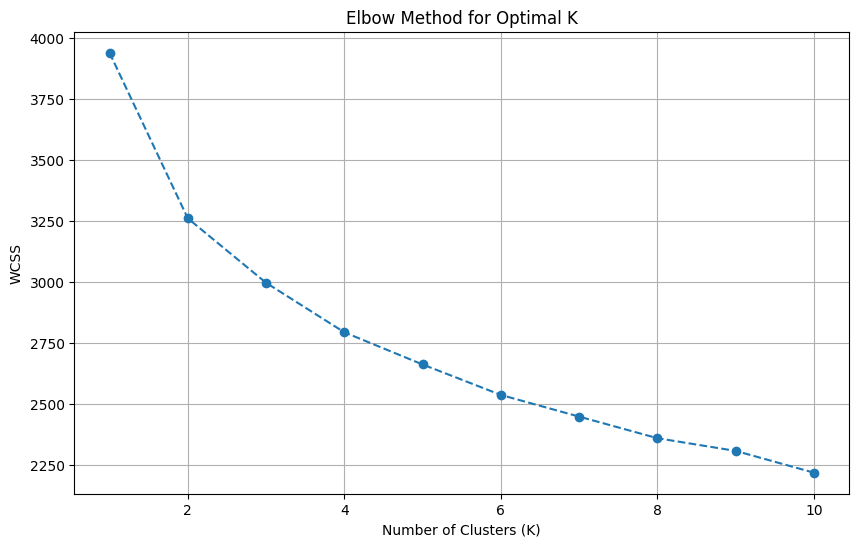

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [38]:
k = 3
kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans_model.fit_predict(X_scaled)

X_scaled_df['Cluster'] = clusters

# Añadir columna sexo original para visualización
X_scaled_df['sexo_original'] = df['sex']

# Evaluar con Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")



Silhouette Score: 0.1286


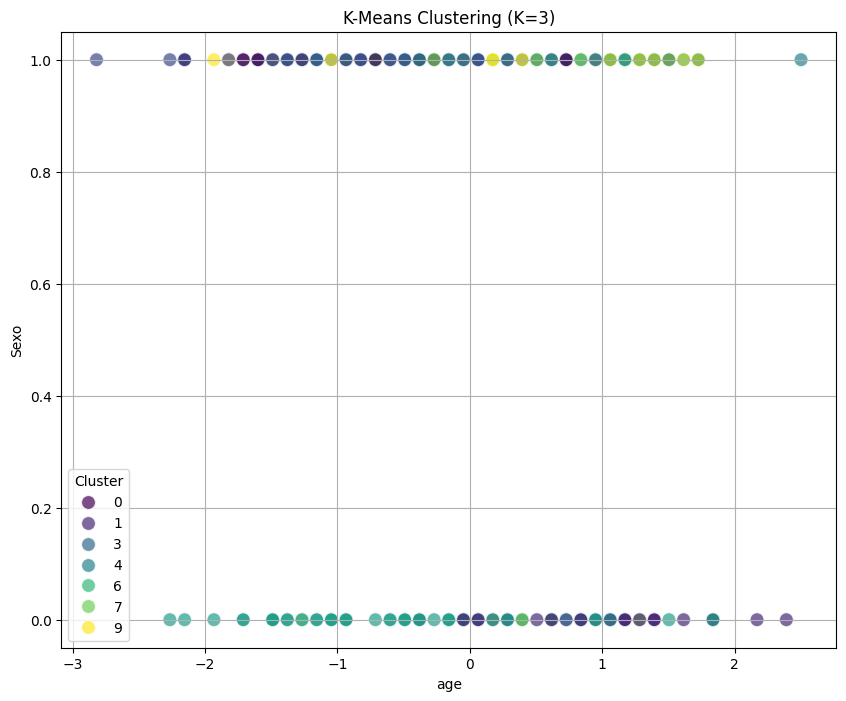

Cluster distribution:
Cluster
3    54
2    47
5    42
1    35
4    27
9    26
0    24
7    18
6    18
8    12
Name: count, dtype: int64


In [40]:
X_scaled_df['Cluster'] = kmeans.labels_

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=X_scaled_df,
    x=X_scaled_df.columns[0],         # puede ser otra feature numérica escalada
    y='sexo_original',                 # aquí usas la original
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title(f'K-Means Clustering (K={k})')
plt.xlabel(X_scaled_df.columns[0])
plt.ylabel('Sexo')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("Cluster distribution:")
print(X_scaled_df['Cluster'].value_counts())